In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter


In [134]:
colors = plt.colormaps['jet'].resampled(5)
#colors(np.linspace(0, 1, 5))


In [135]:
z = np.array([6e6, 6e5, 8e4, 5e3, 5e2])
Dr_r = np.array([6e-5,1.2e-4])
T_cmb = 2.7 # K

In [136]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX



# Hubble cooling

In [137]:
folder = 'PDE-non-linear/hubble_cooling'
file_path = os.path.join(folder, f"Dn.decay.negativemu.dat")
HC = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)

x_hc = HC.iloc[:, 0].values
DI_N_hc = HC.iloc[:, 6].values
DT_hc = HC.iloc[:,4].values
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


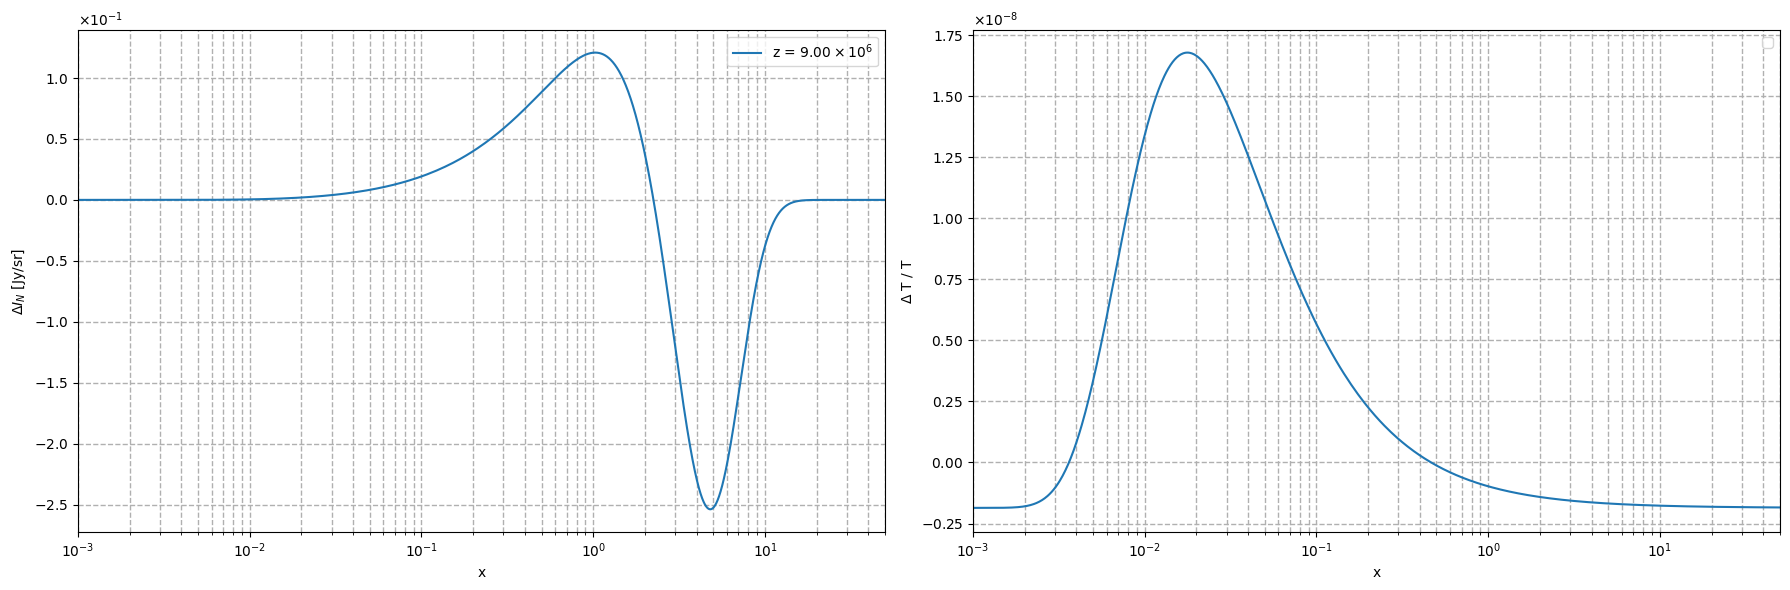

In [138]:
# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle("Hubble cooling ")

# Plot per DI_N2 (primo subplot)

ax1.plot(x_hc, DI_N_hc, label=f"z = {sci_notation(9e6)}")

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
#ax1.set_title("All $\Delta I_{N}$ [Jy/sr]_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend()
ax1.set_xlabel("x")

# Plot per DT2 (secondo subplot)

ax2.plot(x_hc, DT_hc)



ax2.set_xscale('log')
ax2.set_xlim([1e-3, 50])
#ax2.set_ylim([-2.3e-5, 1e-5])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

# Particle Decay

In [139]:
folder = 'PDE-non-linear/heating_simulations/'
x = []
DT = []
DI_N = []
DI = []
DI_CMB = []
I = []
I_CMB = []
decay1 = []

for i in range (5):
    file_path = os.path.join(folder, f"Dn.decay{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    decay1.append(op)

    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    c = op.iloc[:, 5].values
    DI.append(c)
    d = op.iloc[:, 12].values
    DI_CMB.append(d)
    e = op.iloc[:, 6].values
    DI_N.append(e)
    f = op.iloc[:, 10].values
    I_CMB.append(f)
    g= op.iloc[:, 11].values
    I.append(g) 

#decay1[4]

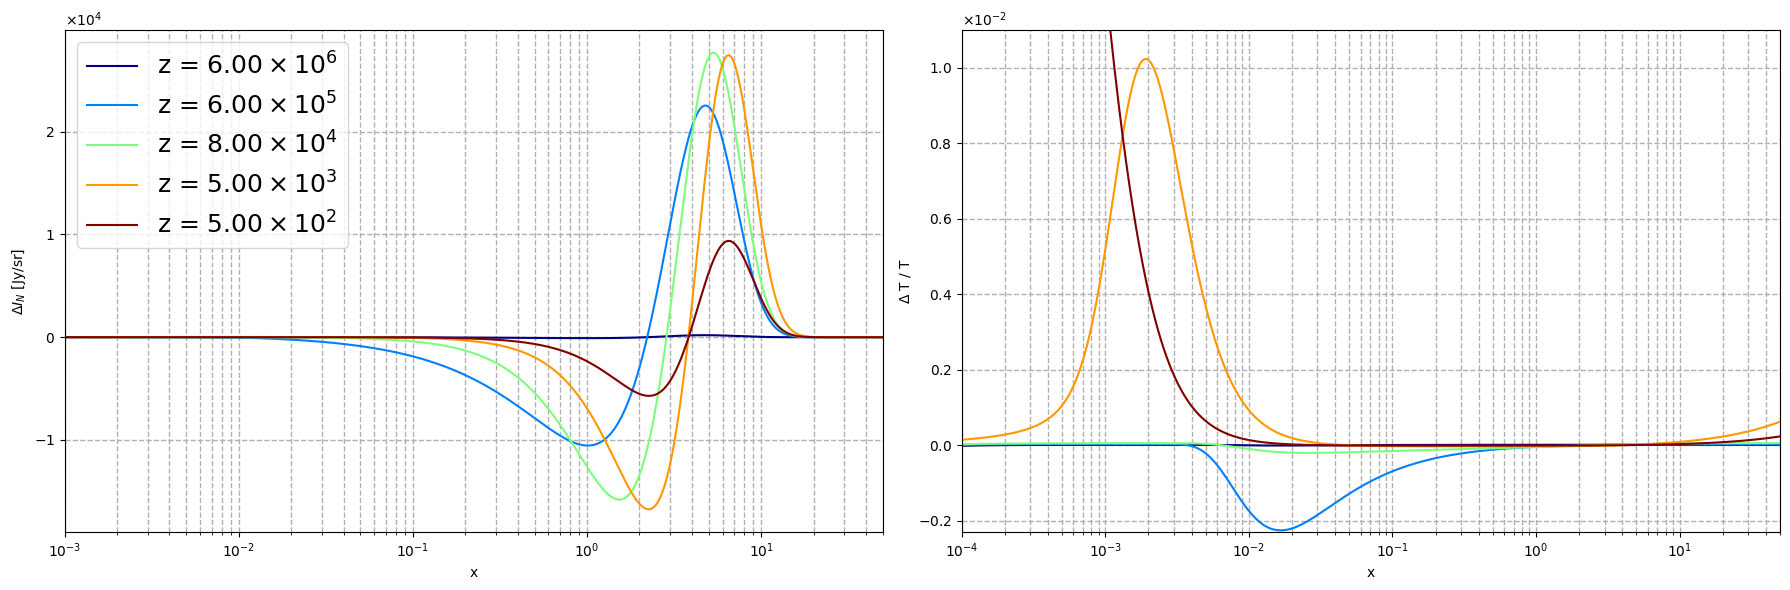

In [140]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    ax1.plot(x[i], DI_N[i], label=f"z = {sci_notation(z[i])}", color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend(fontsize=18)

# Plot per DT2 (secondo subplot)
for i in range(len(z)):
    ax2.plot(x[i], DT[i], color = colors(i))



ax2.set_xscale('log')
ax2.set_xlim([1e-4, 50])
ax2.set_ylim([-2.3e-3, 1.1e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [141]:
#plt.plot(x[3],I[3])
#plt.plot(x[3],I_CMB[3])
#plt.xlim([1e-3, 9e-1])


Text(0.5, 0, 'x ')

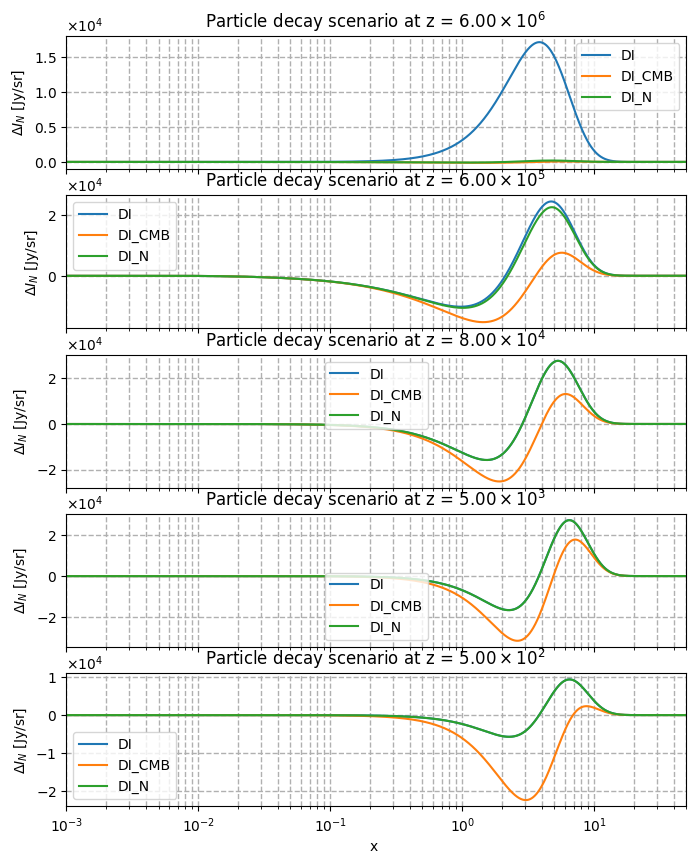

In [142]:

i=4

fig, axs = plt.subplots(5, figsize=(8, 10), sharex = True)

for i in range(5):
    axs[i].set_title(f"Particle decay scenario at z = {sci_notation(z[i])} ")
    
    axs[i].plot(x[i],DI[i], label = "DI")
    axs[i].plot(x[i],DI_CMB[i], label = "DI_CMB")
    axs[i].plot(x[i],DI_N[i], label = "DI_N")

    axs[i].set_xscale('log')
    axs[i].set_ylabel("$\Delta I_{N}$ [Jy/sr]")
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i].legend()
    axs[i].set_xlim([1e-3,50])
    axs[i].yaxis.set_major_formatter(ScalarFormatter())    
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 



#axs[1].plot(x[i],DT[i], label = f"$z$ = {z[i]}")
#axs[1].set_xscale('log')
#axs[1].set_ylabel("$\Delta$ T / T")




plt.xlabel("x ")
#axs[1].grid(True, which = 'both',  linestyle='--', linewidth=1)
#axs[1].legend()
#axs[1].set_xlim([1e-3,50])
#axs[1].set_ylim([-2.5e-4,1e-4])



# Particle Decay with double energy

In [143]:
x2 = []
DT2 = []
DI_N2 = []
decay2 = []

for i in range (5):
    file_path = os.path.join(folder, f"Dn.decay{i+1}.2.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    decay1.append(op)

    a = op.iloc[:, 0].values
    x2.append(a)
    b = op.iloc[:, 4].values
    DT2.append(b)
    c = op.iloc[:, 6].values
    DI_N2.append(c)


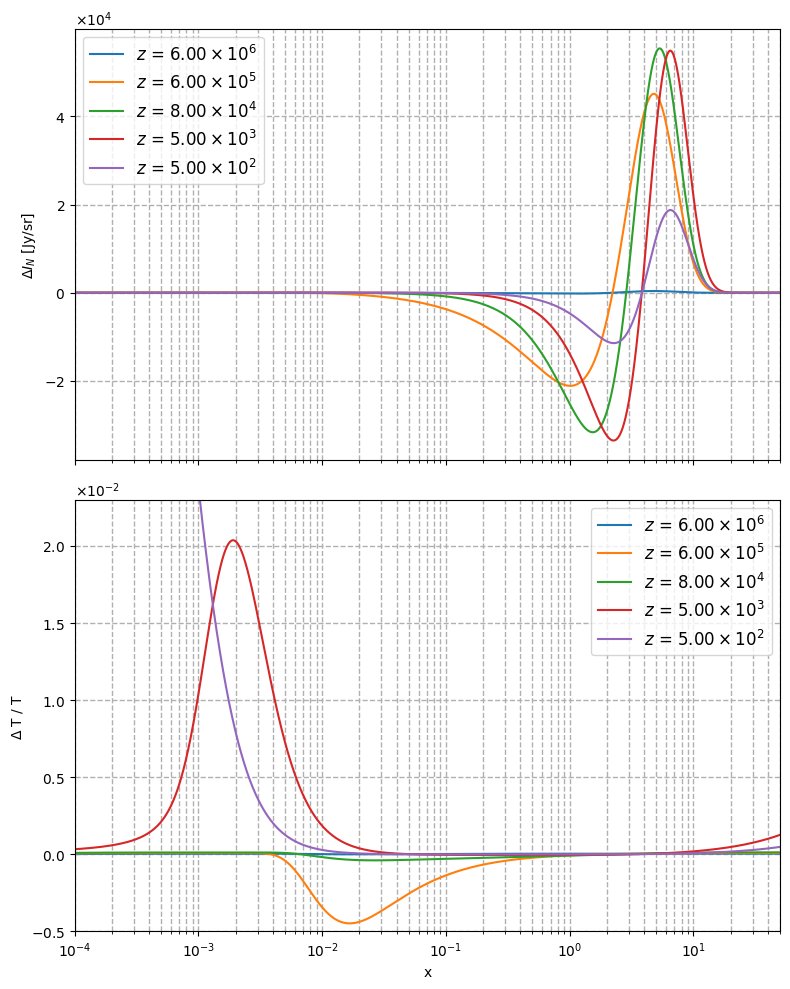

In [144]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
#fig.suptitle(f"Particle decay scenario with total energy density doubled")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    ax1.plot(x2[i], DI_N2[i], label=f"$z$ = {sci_notation(z[i])}")
ax1.set_xscale('log')
ax1.set_xlim([1e-4, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
#ax1.set_title("All $\Delta I_{N}$ [Jy/sr]_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend(fontsize=12)

# Plot per DT2 (secondo subplot)
for i in range(len(z)):
    ax2.plot(x2[i], DT2[i], label=f"$z$ = {sci_notation(z[i])}")
ax2.set_xscale('log')
ax2.set_xlim([1e-4, 50])
ax2.set_ylim([-0.5e-2, 2.3e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
#ax2.set_title("All $\Delta$ T / T curves")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax2.legend(fontsize=12)


ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()



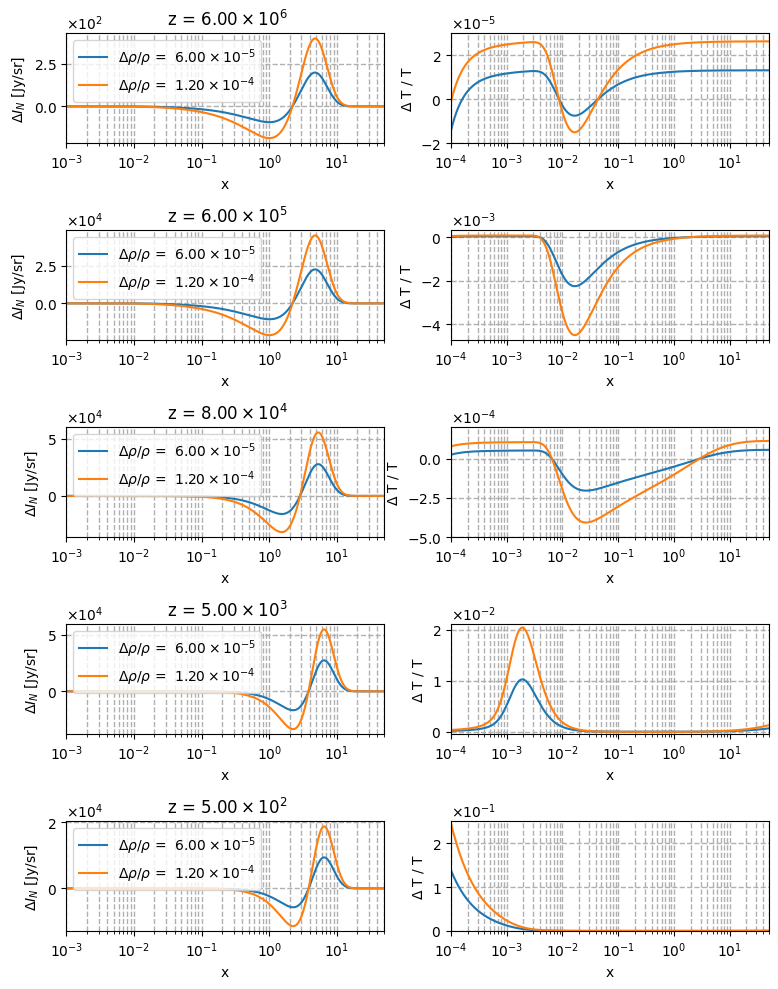

In [145]:
i=0

fig, axs = plt.subplots(5,2, figsize=(8, 10))
#fig.suptitle(f"Particle decay scenario comparing the two different energy density")

for i in range (5):
    axs[i,0].set_title(f" z = {sci_notation(z[i])} ")
    axs[i,0].plot(x[i],DI_N[i], label = f"$\Delta \\rho / \\rho $ =  {sci_notation(Dr_r[0])}")
    axs[i,0].plot(x2[i],DI_N2[i], label = f"$\Delta \\rho / \\rho $ =  {sci_notation(Dr_r[1])}")
    axs[i,0].set_xscale('log')
    axs[i,0].set_ylabel("$\Delta I_{N}$ [Jy/sr]")
    axs[i,0].set_xlabel("x")

    axs[i,0].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i,0].legend()
    axs[i,0].set_xlim([1e-3,50])
    axs[i,0].yaxis.set_major_formatter(ScalarFormatter())    
    axs[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 

for i in range (5):
    axs[i,1].plot(x[i],DT[i], label = f"$\Delta$ r / r =  {sci_notation(Dr_r[0])}")
    axs[i,1].plot(x2[i],DT2[i], label = f"$\Delta$ r / r =  {sci_notation(Dr_r[1])}")
    axs[i,1].set_xscale('log')
    axs[i,1].set_ylabel("$\Delta$ T / T")
    axs[i,1].set_xlabel("x")
    axs[i,1].set_xlim([1e-4,50])
    axs[i,1].grid(True, which = 'both',  linestyle='--', linewidth=1)
    #axs[i,1].legend()
    axs[i,1].yaxis.set_major_formatter(ScalarFormatter())    
    axs[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 




axs[0,1].set_ylim([-2e-5,3e-5])
axs[2,1].set_ylim([-5e-4,2e-4])
axs[3,1].set_ylim([-0.5e-3, 2.1e-2])
axs[4,1].set_ylim([-0.5e-3, 2.5e-1])

plt.tight_layout()






# Instantaneous emission in time

In [146]:
#the difference between a delta in time or in redshift is very small
x_t = []
DT_t = []
DI_N_t = []
delta1 = []

for i in range (5):
    file_path = os.path.join(folder, f"Dn.delta-z{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    delta1.append(op)

    a = op.iloc[:, 0].values
    x_t.append(a)
    b = op.iloc[:, 4].values
    DT_t.append(b)
    c = op.iloc[:, 6].values
    DI_N_t.append(c)

#delta1[4]

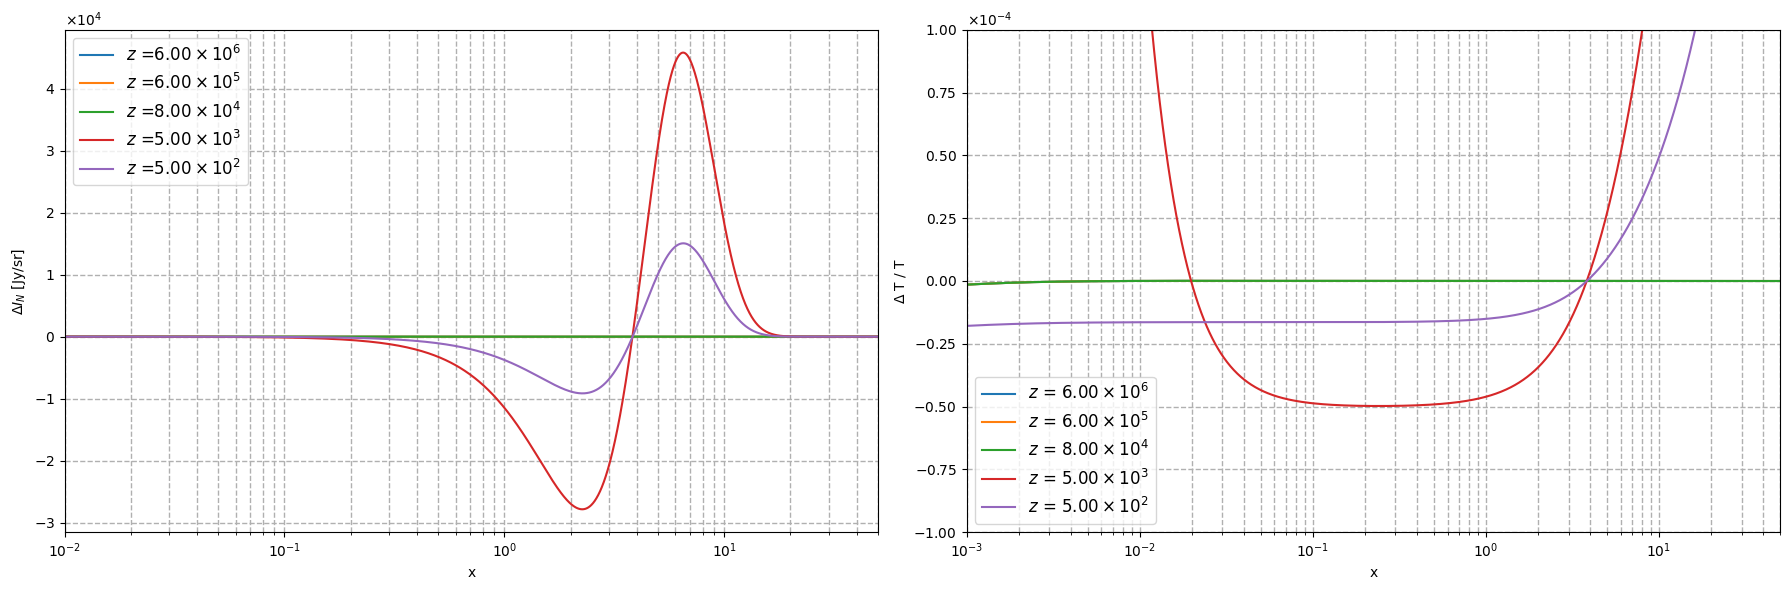

In [147]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Istantaneous injection at different times")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    ax1.plot(x_t[i], DI_N_t[i], label=f"$z$ ={sci_notation(z[i])}")
ax1.set_xscale('log')
ax1.set_xlim([1e-2, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend(fontsize=12)

# Plot per DT2 (secondo subplot)
for i in range(len(z)):
    ax2.plot(x_t[i], DT_t[i], label=f"$z$ = {sci_notation(z[i])}")
ax2.set_xscale('log')
ax2.set_xlim([1e-3, 50])
ax2.set_ylim([-1e-4, 1e-4])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
#ax2.set_title("All $\Delta$ T / T curves")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax2.legend(fontsize=12)


ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

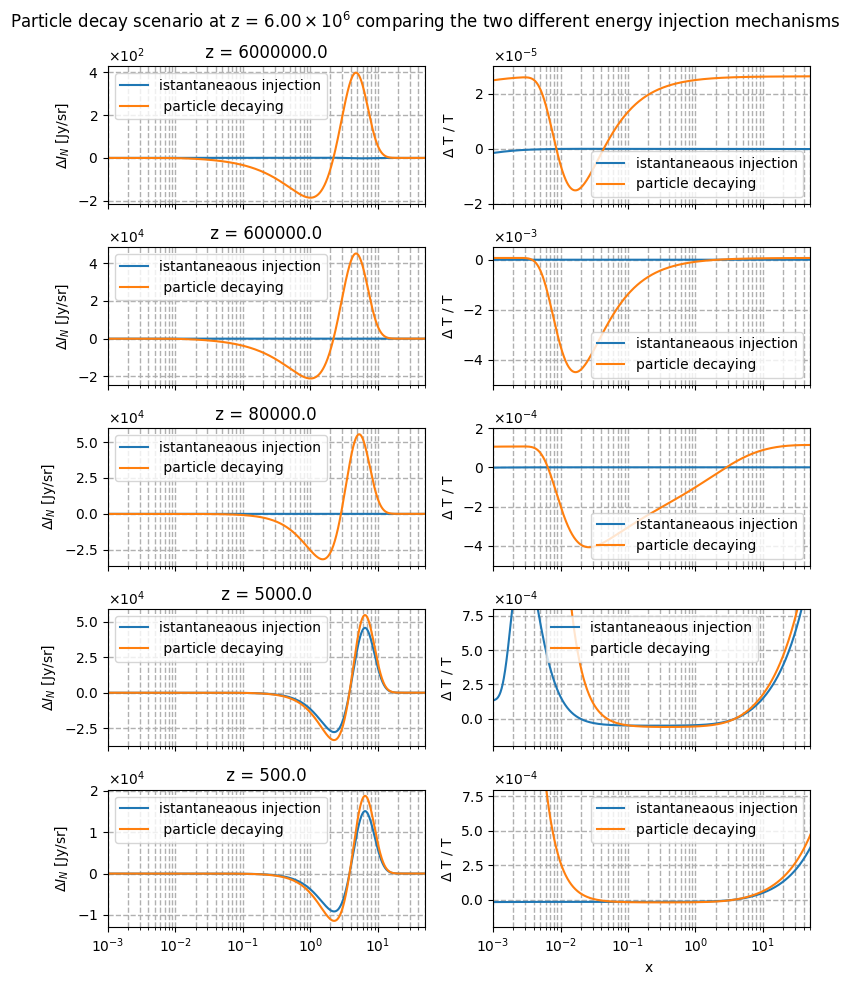

In [148]:
i=0

fig, axs = plt.subplots(5,2, figsize=(8, 10), sharex = True)
fig.suptitle(f"Particle decay scenario at z = {sci_notation(z[i])} comparing the two different energy injection mechanisms")

for i in range (5):
    axs[i,0].set_title(f" z = {z[i]} ")

    axs[i,0].plot(x_t[i],DI_N_t[i], label = "istantaneaous injection")
    axs[i,0].plot(x2[i],DI_N2[i], label = " particle decaying")
    axs[i,0].set_xscale('log')
    axs[i,0].set_ylabel("$\Delta I_{N}$ [Jy/sr]")
    axs[i,0].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i,0].legend()
    axs[i,0].set_xlim([1e-3,50])
    axs[i,0].yaxis.set_major_formatter(ScalarFormatter())    
    axs[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 

for i in range (5):
    axs[i,1].plot(x_t[i],DT_t[i], label = "istantaneaous injection")
    axs[i,1].plot(x2[i],DT2[i], label = "particle decaying")
    axs[i,1].set_xscale('log')
    axs[i,1].set_ylabel("$\Delta$ T / T")
    axs[i,1].set_xlim([1e-3,50])
    axs[i,1].set_ylim([-5e-4,1e-4])
    axs[i,1].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i,1].legend()
    axs[i,1].yaxis.set_major_formatter(ScalarFormatter())    
    axs[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 


plt.xlabel("x ")

axs[0,1].set_ylim([-2e-5,3e-5])
axs[1,1].set_ylim([-5e-3,5e-4])
axs[2,1].set_ylim([-5e-4,2e-4])
axs[3,1].set_ylim([-2e-4,8e-4])
axs[4,1].set_ylim([-2e-4,8e-4])

plt.tight_layout()
plt.show()


In [149]:
#import temperature parameters for particle dacay scenario

folder = 'PDE-non-linear/temperatures/'
zx = []
Tz = []
Te= []
Tg = []
Tr = []
Tn = []


for i in range (5):
    file_path = os.path.join(folder, f"Temperatures.decay{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    a = op.iloc[:, 0].values
    zx.append(a)
    b = op.iloc[:, 1].values
    Tz.append(b)
    f = op.iloc[:, 2].values
    Te.append(f)
    c = op.iloc[:, 3].values
    Tg.append(c)
    d = op.iloc[:, 4].values
    Tr.append(d)
    e = op.iloc[:, 5].values
    Tn.append(e)
    

In [150]:
#import temperature parameters for no energu injection scenario, trying to study the convergence at different points

folder = 'PDE-non-linear/temperatures/'



file_path = os.path.join(folder, "Temperatures.no_distortion4.dat")
op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
zx0 = op.iloc[:, 0].values
Tz0 = op.iloc[:, 1].values
Te0 = op.iloc[:, 2].values
Tg0 = op.iloc[:, 3].values
Tr0 = op.iloc[:, 4].values
Tn0 = op.iloc[:, 5].values


In [151]:
folder = 'PDE-non-linear/temperatures/'



file_path = os.path.join(folder, "Temperatures.no_distortion8.2.dat")
op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
zx0_8 = op.iloc[:, 0].values
Tz0_8 = op.iloc[:, 1].values
Te0_8 = op.iloc[:, 2].values
Tg0_8 = op.iloc[:, 3].values
Tr0_8 = op.iloc[:, 4].values
Tn0_8 = op.iloc[:, 5].values

In [152]:
folder = 'PDE-non-linear/temperatures/'



file_path = os.path.join(folder, "Temperatures.no_distortion16.dat")
op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
zx0_16 = op.iloc[:, 0].values
Tz0_16 = op.iloc[:, 1].values
Te0_16 = op.iloc[:, 2].values
Tg0_16 = op.iloc[:, 3].values
Tr0_16 = op.iloc[:, 4].values
Tn0_16 = op.iloc[:, 5].values

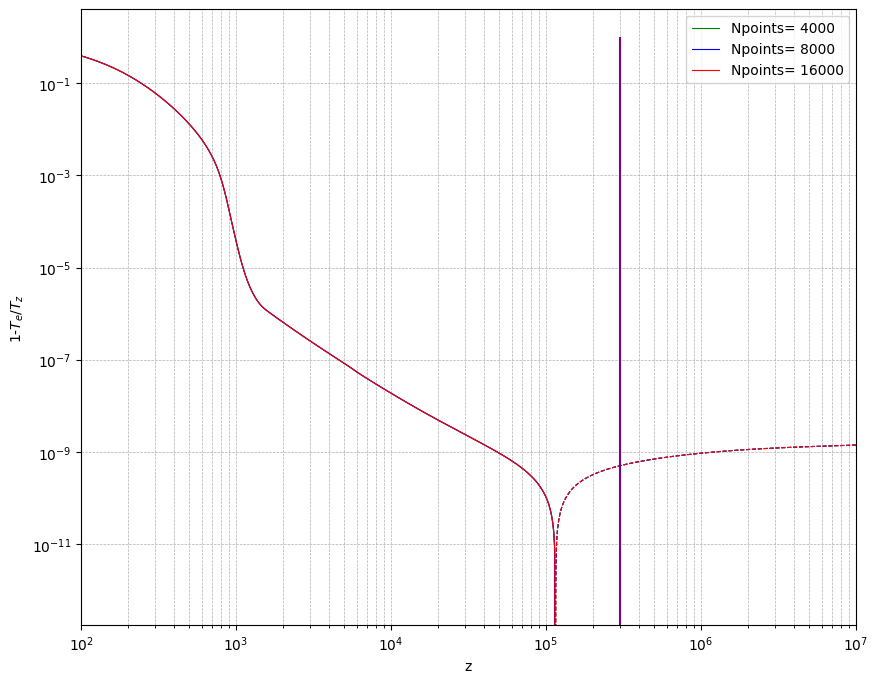

In [153]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(zx0, 1-Te0/Tz0, label= "Npoints= 4000", linewidth= "0.8", linestyle = "solid", color = "green")
ax.plot(zx0, -(1-Te0/Tz0),  linewidth= "0.8", linestyle = "dashed",color = "green")

ax.plot(zx0_8, 1-Te0_8/Tz0_8, label= "Npoints= 8000", linewidth= "0.8",  linestyle = "solid", color = "blue")
ax.plot(zx0_8, -(1-Te0_8/Tz0_8),  linewidth= "0.8", linestyle = "dashed", color = "blue" )

ax.plot(zx0_16, 1-Te0_16/Tz0_16, label= "Npoints= 16000", linewidth= "0.8",  linestyle = "solid", color = "red" )
ax.plot(zx0_16, -(1-Te0_16/Tz0_16),  linewidth= "0.8",  linestyle = "dashed", color = "red")



plt.vlines(x = 3e5, ymin = 0, ymax = 1,
           colors = 'purple')

ax.set_xlabel("z")
ax.set_ylabel("1-$T_e / T_z$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend()


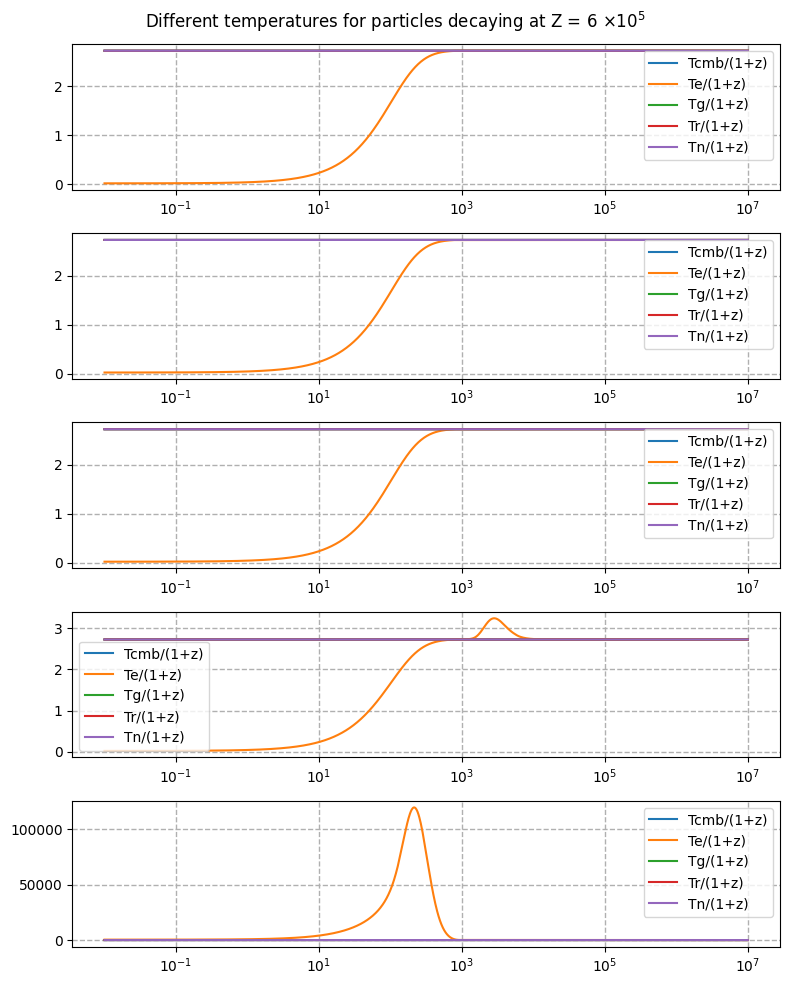

In [154]:
i=0
fig, axs = plt.subplots(5,1, figsize=(8, 10))
fig.suptitle(f"Different temperatures for particles decaying at Z = 6 $\\times 10^5$")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], Tz[i]/(1+zx[i]), label = "Tcmb/(1+z)")
    axs[i].plot(zx[i], Te[i]/(1+zx[i]), label = "Te/(1+z)")
    axs[i].plot(zx[i], Tg[i]/(1+zx[i]), label = "Tg/(1+z)")
    axs[i].plot(zx[i], Tr[i]/(1+zx[i]), label = "Tr/(1+z)")
    axs[i].plot(zx[i], Tn[i]/(1+zx[i]), label = "Tn/(1+z)")
    axs[i].set_xscale('log')
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i].legend()
    #axs[i].set_yscale('log')

#axs.set_xlim([1e-3, 600])
#axs.set_ylim([0, 1000])
#ax].set_ylabel("$\Delta I_{N}$ [Jy/sr]")
#ax].set_title("All $\Delta$ I_N curves")


plt.tight_layout()
plt.show()

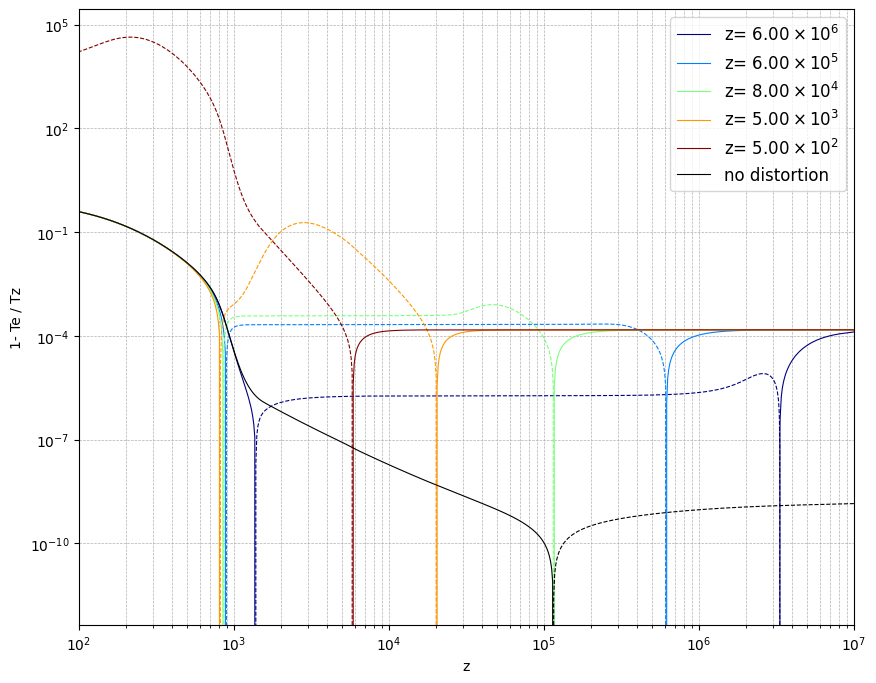

In [168]:
fig, ax = plt.subplots(figsize=(10,8))
#fig.suptitle(f"Difference between electron temperature and cmb temperature at different redshifts Te-Tz/Tz ")

for i in range (len(z-1)):
    ax.plot(zx[i], (Tz[i]-Te[i])/Tz[i], label = f"z= {sci_notation(z[i])}", linewidth= "0.8", color = colors(i), linestyle = "solid")
    ax.plot(zx[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = colors(i), linestyle = "dashed")



ax.plot(zx0, (Tz0-Te0)/Tz0, label= "no distortion", linewidth= "0.8", color = "black", linestyle = "solid")
ax.plot(zx0, -(Tz0-Te0)/Tz0,  linewidth= "0.8", color = "black", linestyle = "dashed")


ax.set_xlabel("z")
ax.set_ylabel("1- Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

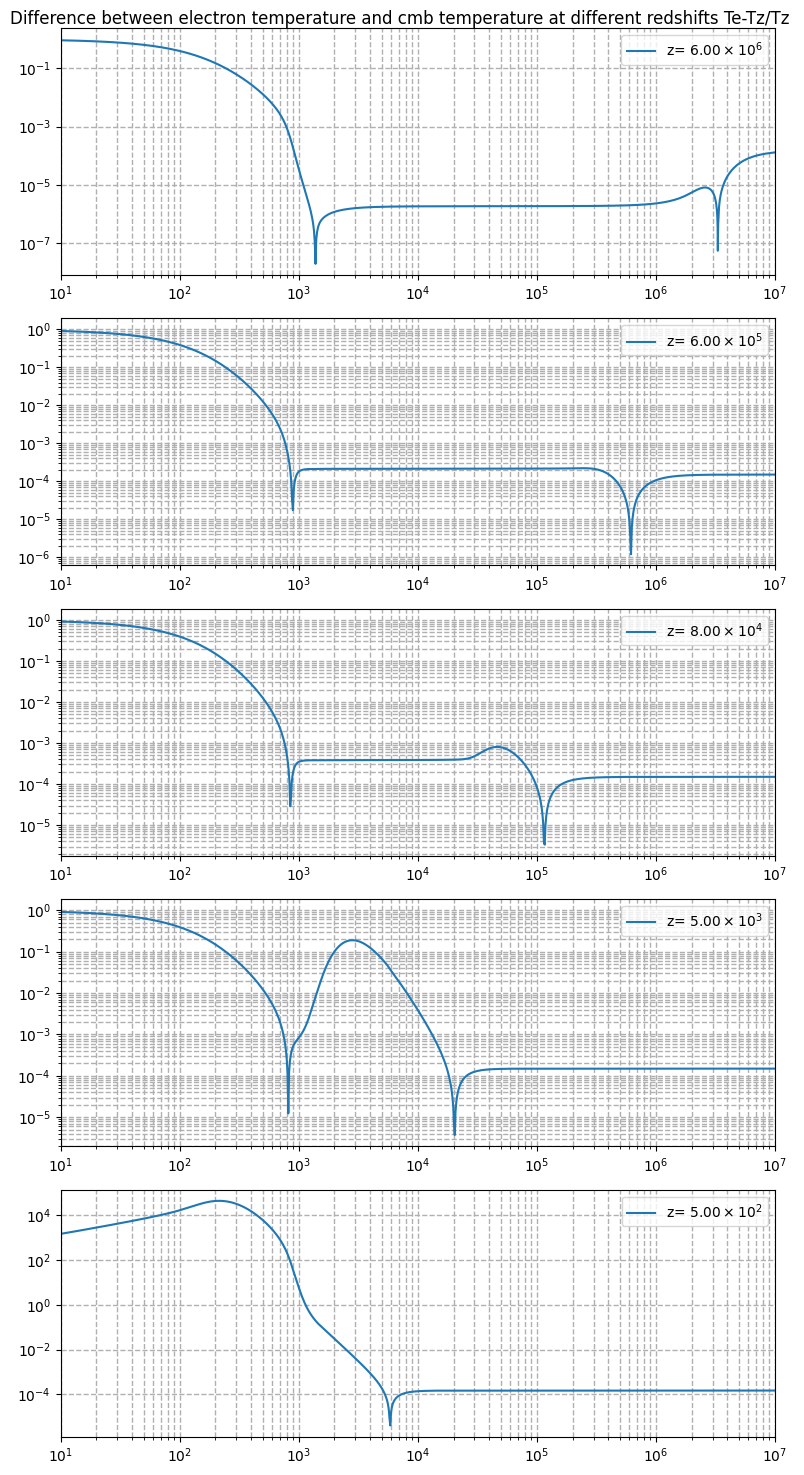

In [156]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Difference between electron temperature and cmb temperature at different redshifts Te-Tz/Tz ")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tz[i]-Te[i])/Tz[i]), label = f"z= {sci_notation(z[i])}")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)



plt.tight_layout()
plt.show()

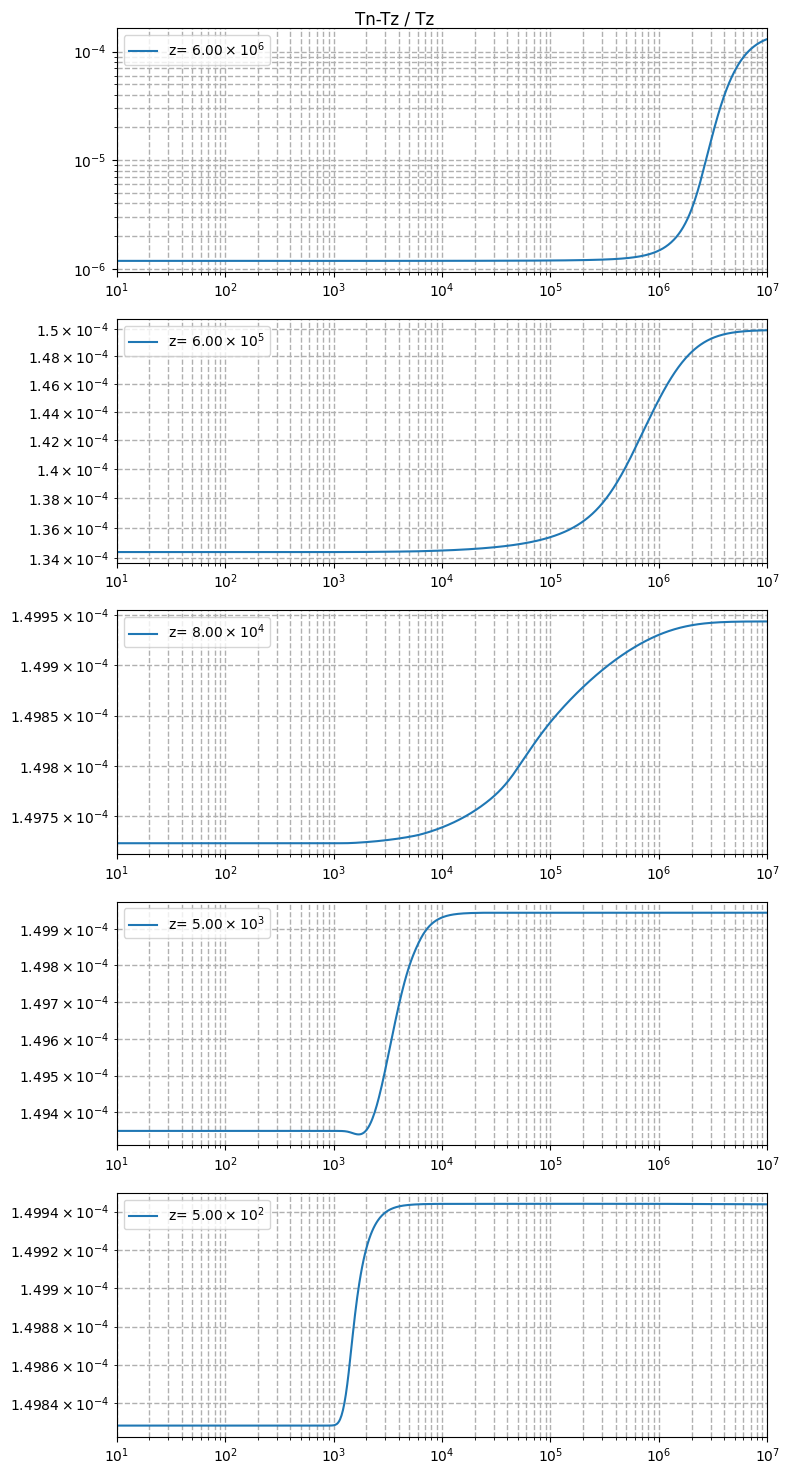

In [157]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Tn-Tz / Tz")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tn[i]-Tz[i])/Tz[i]), label = f"z= {sci_notation(z[i])}")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

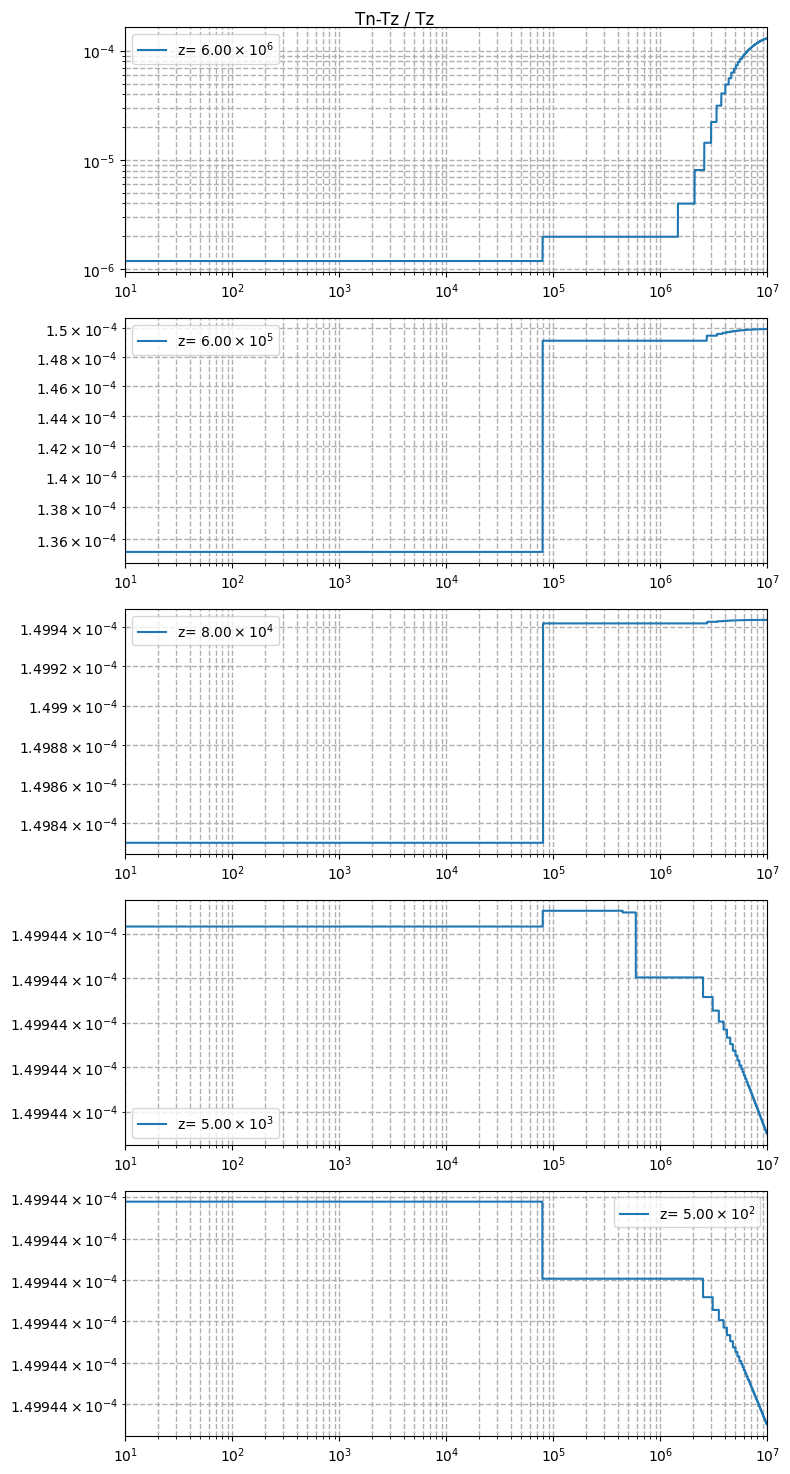

In [158]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Tn-Tz / Tz")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tg[i]-Tz[i])/Tz[i]), label = f"z= {sci_notation(z[i])}")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

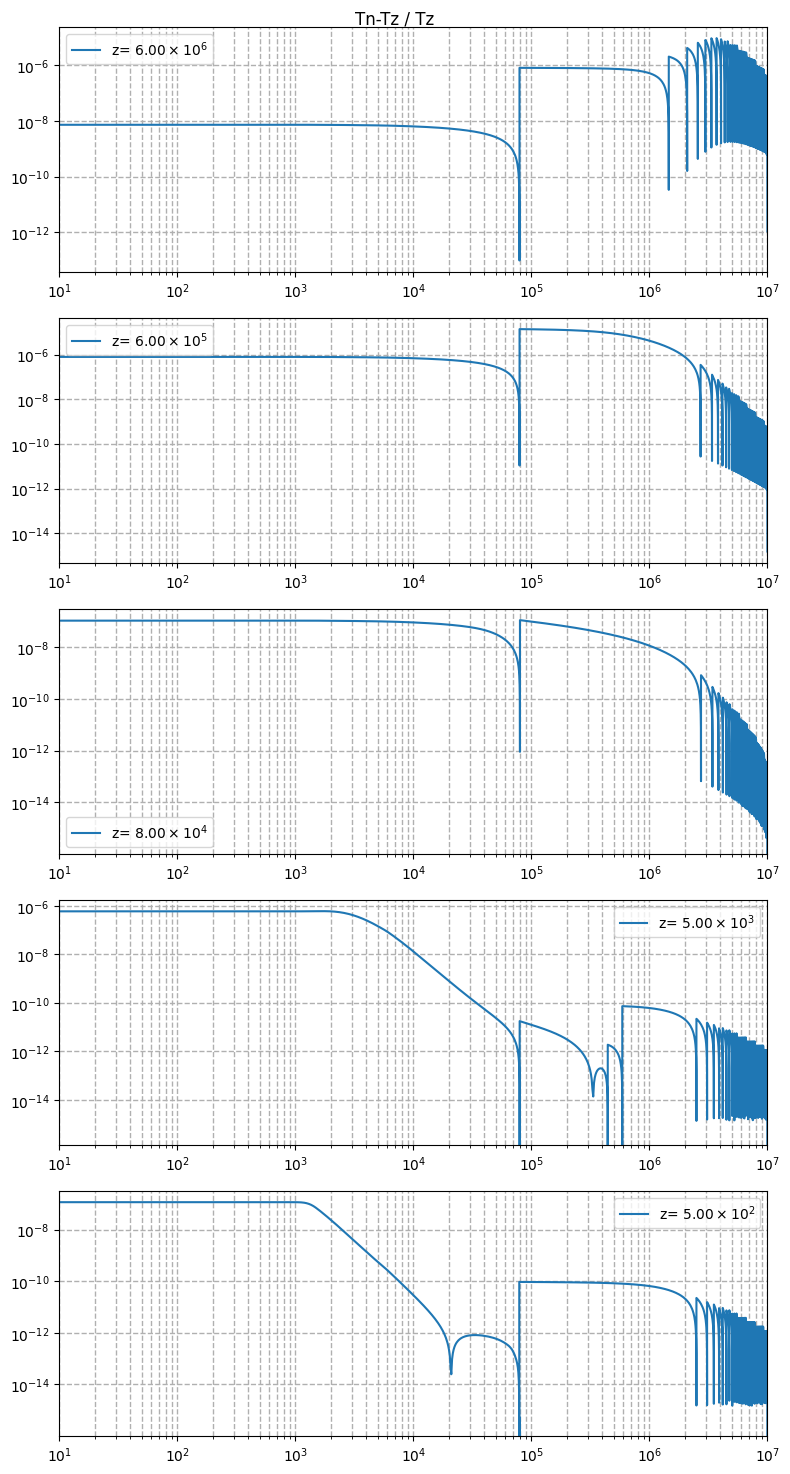

In [159]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Tn-Tz / Tz")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tg[i]-Tn[i])/Tn[i]), label = f"z= {sci_notation(z[i])}")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

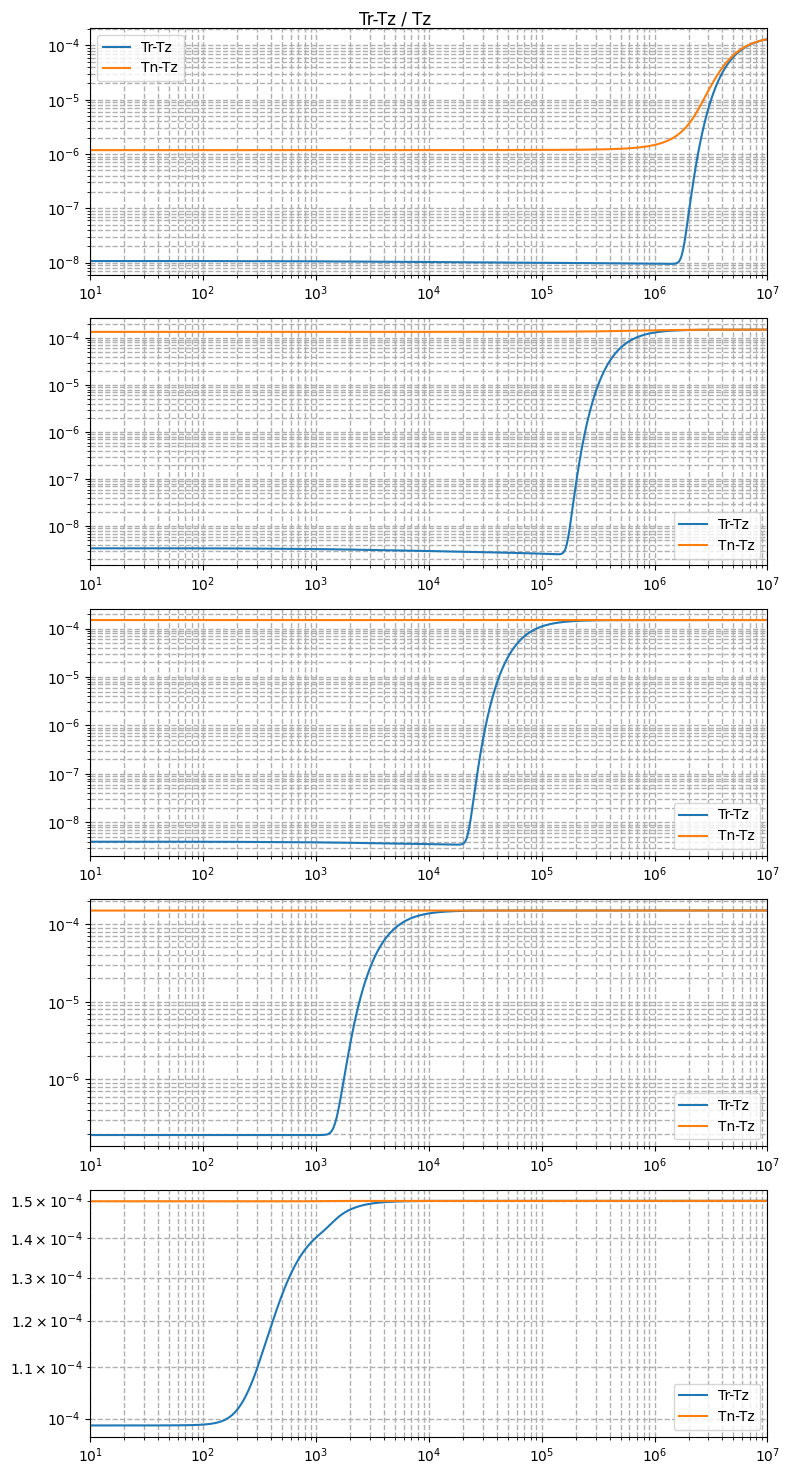

In [160]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Tr-Tz / Tz")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tr[i]-Tz[i])/Tz[i]), label = f"Tr-Tz")
    axs[i].plot(zx[i], abs((Tn[i]-Tz[i])/Tz[i]), label = f"Tn-Tz")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

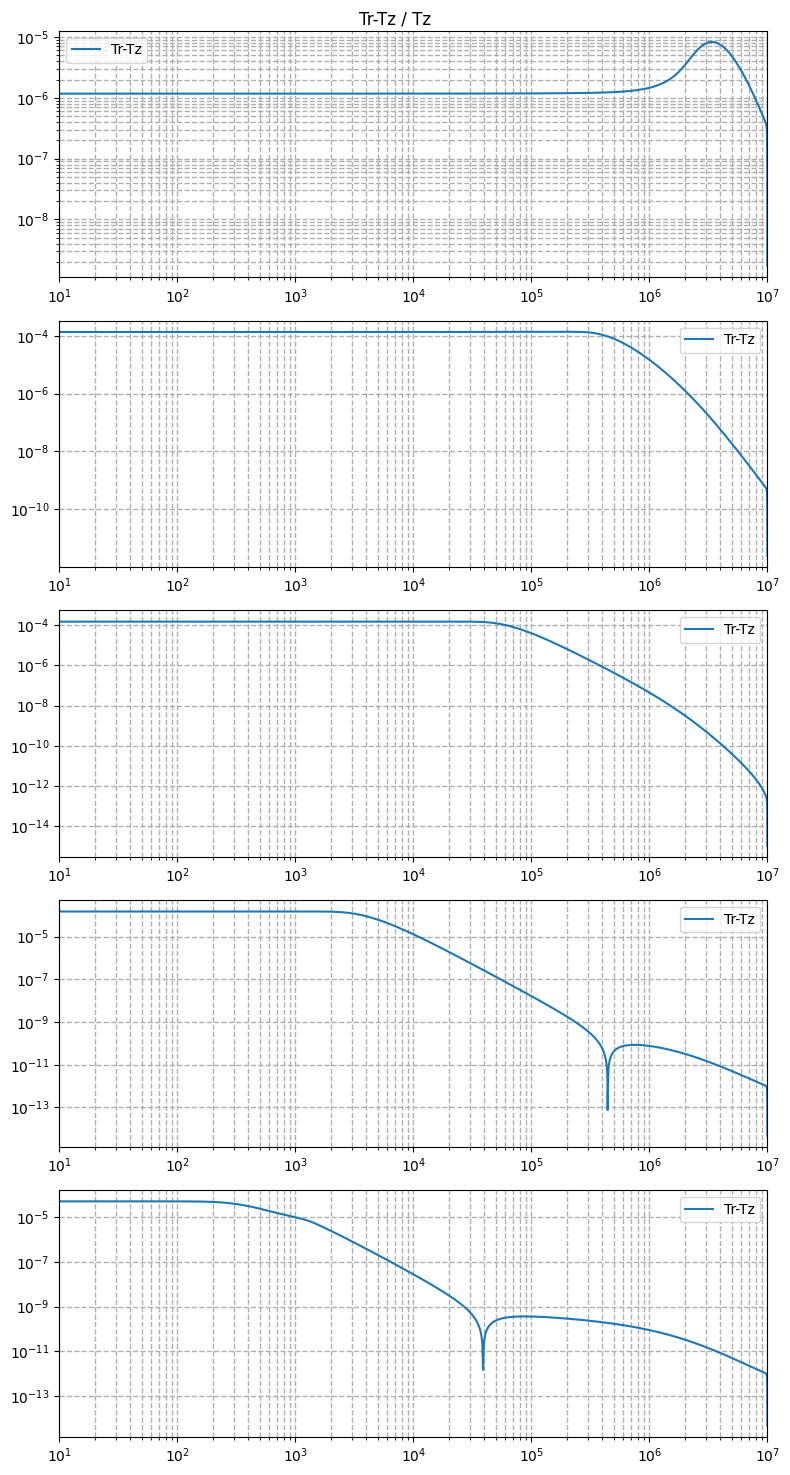

In [161]:
fig, axs = plt.subplots(5,1, figsize=(8, 15))
fig.suptitle(f"Tr-Tz / Tz")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], abs((Tr[i]-Tn[i])/Tn[i]), label = f"Tr-Tz")
    axs[i].set_xscale('log')
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_xlim([1e1, 1e7])
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

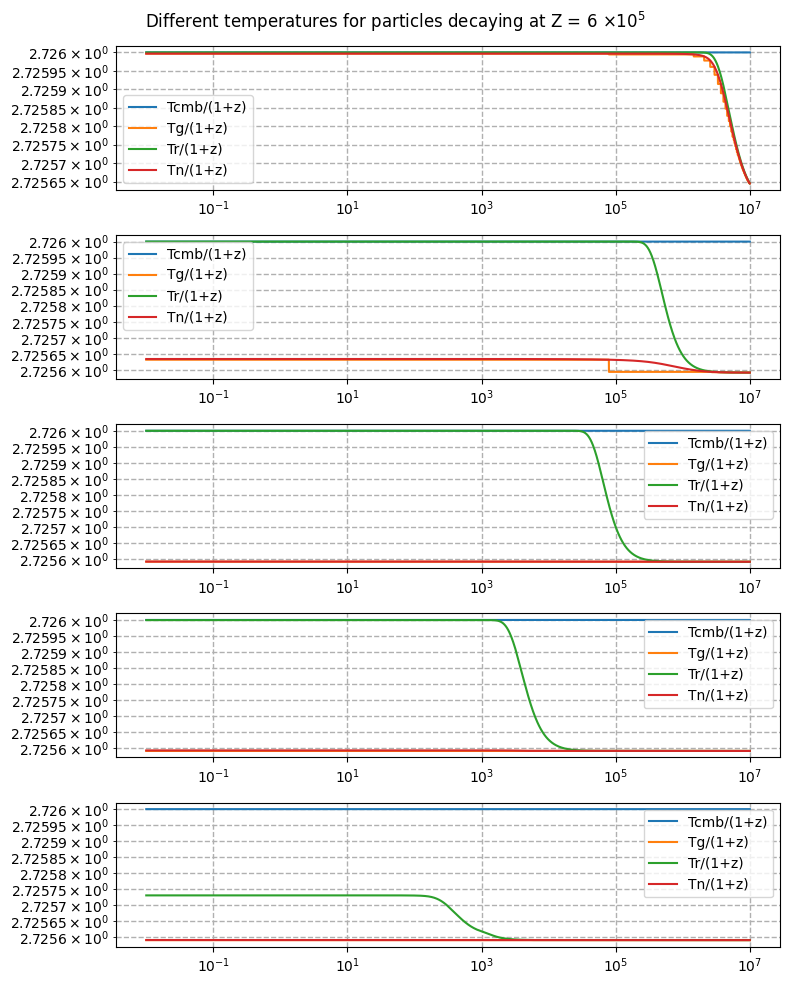

In [162]:
i=0
fig, axs = plt.subplots(5,1, figsize=(8, 10))
fig.suptitle(f"Different temperatures for particles decaying at Z = 6 $\\times 10^5$")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    axs[i].plot(zx[i], Tz[i]/(1+zx[i]), label = "Tcmb/(1+z)")
    axs[i].plot(zx[i], Tg[i]/(1+zx[i]), label = "Tg/(1+z)")
    axs[i].plot(zx[i], Tr[i]/(1+zx[i]), label = "Tr/(1+z)")
    axs[i].plot(zx[i], Tn[i]/(1+zx[i]), label = "Tn/(1+z)")
    axs[i].set_xscale('log')
    axs[i].grid(True, which = 'both',  linestyle='--', linewidth=1)
    axs[i].legend()
    axs[i].set_yscale('log')

#axs.set_xlim([1e-3, 600])
#axs.set_ylim([0, 1000])
#ax].set_ylabel("$\Delta I_{N}$ [Jy/sr]")
#ax].set_title("All $\Delta$ I_N curves")


plt.tight_layout()
plt.show()